In [2]:
import numpy as np
import seaborn as sns ; sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df = pd.read_csv('u.data',sep='\t',names=['user_id','item_id','movie_rating','timestamp'])

In [23]:
df.head()

,user_id,item_id,movie_rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [24]:
items_df = pd.read_csv('Movie_Id_Titles')
items_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [25]:
movie_df = pd.merge(df,items_df)
movie_df.head()

,user_id,item_id,movie_rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [72]:
ratings = pd.DataFrame()
ratings['Rating'] = movie_df.groupby('title')['movie_rating'].mean()
ratings['Number of ratings'] = movie_df.groupby('title')['movie_rating'].count()
ratings.head()

,Rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Figure size 720x576 with 0 Axes>

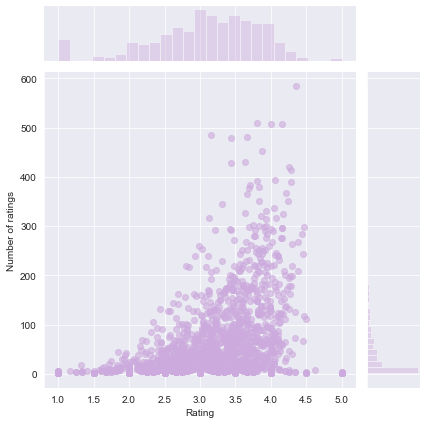

In [73]:
plt.figure(figsize=(10,8))
sns.jointplot(x='Rating',y='Number of ratings',data=ratings,color='#CADA',alpha=0.6)

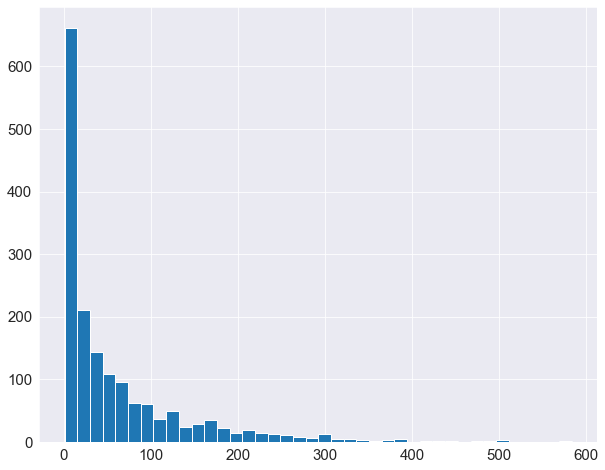

In [74]:
plt.figure(figsize=(10,8))
ratings['Number of ratings'].hist(bins=40,xlabelsize=15,ylabelsize=15)

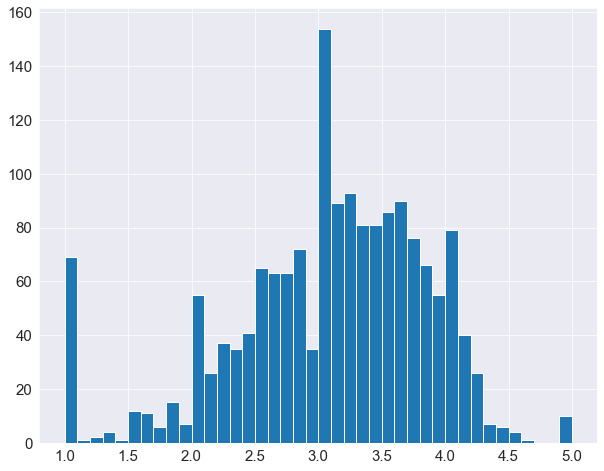

In [75]:
plt.figure(figsize=(10,8))
ratings['Rating'].hist(bins=40,xlabelsize=15,ylabelsize=15)

In [85]:
moviemat = movie_df.pivot_table(index='user_id',columns='title',values='movie_rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
movie_df.groupby('title')['movie_rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: movie_rating, Length: 1664, dtype: int64

In [98]:
#Star Wars Series
SW_ratings = moviemat['Star Wars (1977)']
SW_ratings.dropna(inplace=True)
SW_ratings

user_id
0      5.0
1      5.0
2      5.0
4      5.0
5      4.0
      ... 
937    5.0
938    5.0
940    4.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 584, dtype: float64

In [102]:
#Liar Liar Series
LL_ratings = moviemat['Liar Liar (1997)']
LL_ratings.dropna(inplace=True)
LL_ratings

user_id
2      1.0
3      2.0
4      5.0
6      2.0
7      1.0
      ... 
927    5.0
936    3.0
937    1.0
940    4.0
941    4.0
Name: Liar Liar (1997), Length: 485, dtype: float64

In [118]:
Similar_To_SW = pd.DataFrame(moviemat.corrwith(SW_ratings),columns=['Correlation'])
Similar_To_SW = Similar_To_SW.join(ratings['Number of ratings'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [119]:
Similar_To_LL = pd.DataFrame(moviemat.corrwith(LL_ratings),columns=['Correlation'])
Similar_To_LL = Similar_To_LL.join(ratings['Number of ratings'])

In [123]:
Similar_To_SW[Similar_To_SW['Number of ratings'] > 50].sort_values('Correlation',ascending=False)

,Correlation,Number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
...,...,...
Excess Baggage (1997),-0.239936,52
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",-0.241561,54
"Walk in the Clouds, A (1995)",-0.257007,63


In [141]:
Similar_To_SW[Similar_To_SW['Number of ratings'] > 50].sort_values('Correlation',ascending=False)

,Correlation,Number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
...,...,...
Excess Baggage (1997),-0.239936,52
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",-0.241561,54
"Walk in the Clouds, A (1995)",-0.257007,63
